# Library

In [1]:
# utilities
import csv_treatments
import pre_processing
import reports
import pattern_extraction
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 5000)


# Settings

In [2]:
# Path to the dataset
csv_path = '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1.csv'

# Number of lines to be read from the dataset
number_csv_lines = None

# Dictionay with type of data for each column
dtype_dict = {
    'ID_ANIMAL': 'uint32',
    'EstabelecimentoMunicipio': 'category',
    'Frigorifico_ID': 'uint8',
    'Frigorifico_CNPJ': 'uint64',
    'Frigorifico_RazaoSocial': 'category',
    'Municipio_Frigorifico': 'category',
    'Tipificacao': 'category',
    'Maturidade': 'category',
    'Acabamento': 'category',
    'Peso': 'float32',
    'EstabelecimentoIdentificador': 'uint16',
    'Questionario_ID': 'uint16',
    'QuestionarioClassificacaoEstabel': 'uint8',
    'FERTIIRRIGACAO': 'uint8',
    'ILP': 'uint8',
    'IFP': 'uint8',
    'ILPF': 'uint8',
    'CONCEN_VOLUM': 'UInt8',
    'CREEPFEEDING': 'UInt8',
    'FORN_ESTRAT_SILAGEM': 'UInt8',
    'PROTEICO': 'UInt8',
    'PROTEICO_ENERGETICO': 'UInt8',
    'RACAO_BAL_CONS_INFERIOR': 'UInt8',
    'SAL_MINERAL': 'UInt8',
    'SALMINERAL_UREIA': 'UInt8',
    'RACAOO_BAL_CONSUMO_IG': 'UInt8',
    'GRAO_INTEIRO': 'UInt8',
    'ALTO_CONCENTR_VOLUM': 'UInt8',
    'ALTO_CONCENTRADO': 'UInt8',
    'QuestionarioPossuiOutrosIncentiv': 'uint8',
    'QuestionarioFabricaRacao': 'uint8',
    'area so confinamento': 'UInt8',
    'regua de manejo': 'UInt8',
    'boa cobertura vegetal, com baixa': 'UInt8',
    'erosaoo laminar ou em sulco igua': 'UInt8',
    'identificacao individual': 'UInt8',
    'rastreamento SISBOV': 'UInt8',
    'Lista Trace': 'UInt8',
    'BPA': 'UInt8',
    'participa de aliancas mercadolog': 'UInt8',
    'QuestionarioPraticaRecuperacaoPa': 'uint8',
    'Confinamento': 'UInt8',
    'Suplementacao_a_campo': 'UInt8',
    'SemiConfinamento': 'UInt8',
    'dif_datas': 'uint16',
    'tot7d_Chuva': 'float32',
    'med7d_TempInst': 'float32',
    'med7d_TempMin': 'float32',
    'med7d_UmidInst': 'float32',
    'med7d_formITUinst': 'float32',
    'med7d_formITUmax': 'float32',
    'med7d_NDVI': 'float32',
    'med7d_EVI': 'float32',
    'med7d_preR_soja': 'float32',
    'med7d_preR_milho': 'float32',
    'med7d_preR_boi': 'float32',
    'tot1m_Chuva': 'float32',
    'med1m_TempInst': 'float32',
    'med1m_UmidInst': 'float32',
    'med1m_formITUinst': 'float32',
    'med1m_NDVI': 'float32',
    'med1m_EVI': 'float32',
    'med1m_preR_soja': 'float32',
    'med1m_preR_milho': 'float32',
    'med1m_preR_boi': 'float32',
    'tot3m_Chuva': 'float32',
    'med3m_TempInst': 'float32',
    'med3m_UmidInst': 'float32',
    'med3m_formITUinst': 'float32',
    'med3m_formITUmax': 'float32',
    'med3m_NDVI': 'float32',
    'med3m_EVI': 'float32',
    'med3m_preR_soja': 'float32',
    'med3m_preR_milho': 'float32',
    'med3m_preR_boi': 'float32',
    'tot6m_Chuva': 'float32',
    'med6m_TempInst': 'float32',
    'med6m_UmidInst': 'float32',
    'med6m_formITUinst': 'float32',
    'med6m_NDVI': 'float32',
    'med6m_EVI': 'float32',
    'med6m_preR_soja': 'float32',
    'med6m_preR_milho': 'float32',
    'med6m_preR_boi': 'float32',
    'tot12m_Chuva': 'float32',
    'med12m_TempInst': 'float32',
    'med12m_TempMin': 'float32',
    'med12m_UmidInst': 'float32',
    'med12m_formITUinst': 'float32',
    'med12m_NDVI': 'float32',
    'med12m_EVI': 'float32',
    'med12m_preR_soja': 'float32',
    'med12m_preR_milho': 'float32',
    'med12m_preR_boi': 'float32',
    'cnt7d_CL_ITUinst': 'float32',
    'cnt1m_CL_ITUinst': 'float32',
    'cnt3m_CL_ITUinst': 'float32',
    'cnt6m_CL_ITUinst': 'float32',
    'cnt12m_CL_ITUinst': 'float32',
    'ANO': 'uint16',
    'CATEGORIA': 'category',
    'classificacao': 'category',
    'Motivo': 'category'
}

# List with dates to parse
parse_dates = [
    'DataAbate', 'Data_homol', 'DataAbate_6m_ANT',
    'data_homol_select', 'data12m', 'data6m',
    'data3m', 'data1m', 'data7d'
]

# List with columns to delete when loading dataset
# delete_columns_names_on_load_data = None
delete_columns_names_on_load_data = [
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]


# CSV Treatments

## Dataset

In [3]:
# Load the dataset
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=csv_path, delete_columns_names=delete_columns_names_on_load_data,
    number_csv_lines=number_csv_lines, dtype_dict=dtype_dict, parse_dates=parse_dates
)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 3153593
Número de colunas: 112
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153593 entries, 0 to 3153592
Data columns (total 112 columns):
 #    Column                            Dtype         
---   ------                            -----         
 0    ID_ANIMAL                         uint32        
 1    EstabelecimentoMunicipio          category      
 2    DataAbate                         datetime64[ns]
 3    Frigorifico_ID                    uint8         
 4    Frigorifico_CNPJ                  uint64        
 5    Frigorifico_RazaoSocial           category      
 6    Municipio_Frigorifico             category      
 7    Tipificacao                       category      
 8    Maturidade                        category      
 9    Acabamento                        category      
 10   Peso                              float32       
 11   Estabelecim

# Reports

## All attributes

In [6]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)



*****INICIO RELATÓRIO ATRIBUTOS******
Número de atributos: 65
Nome dos atributos: ['ID_ANIMAL', 'EstabelecimentoMunicipio', 'DataAbate', 'Tipificacao', 'Maturidade', 'Acabamento', 'Peso', 'QuestionarioClassificacaoEstabel', 'FERTIIRRIGACAO', 'ILP', 'IFP', 'ILPF', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM', 'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA', 'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'regua de manejo', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'identificacao individual', 'rastreamento SISBOV', 'BPA', 'participa de aliancas mercadolog', 'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Suplementacao_a_campo', 'SemiConfinamento', 'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi', 'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi

## Delete duplicate rows by attribute, and print the report

In [4]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = pre_processing.delete_columns(
    data_frame=precoce_ms_data_frame, columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



,ID_ANIMAL,EstabelecimentoMunicipio,DataAbate,Tipificacao,Maturidade,Acabamento,Peso,QuestionarioClassificacaoEstabel,FERTIIRRIGACAO,ILP,...,med12m_preR_milho,med12m_preR_boi,cnt7d_CL_ITUinst,cnt1m_CL_ITUinst,cnt3m_CL_ITUinst,cnt6m_CL_ITUinst,cnt12m_CL_ITUinst,ANO,CATEGORIA,classificacao
2361947,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361946,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361949,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361957,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361945,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361955,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361956,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361959,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361950,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361943,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM


Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

## NaN attributes

In [5]:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=True)

reports.informations(data_frame=precoce_ms_data_frame)



*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.

*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 1243483
Linhas com valores NaN:         EstabelecimentoMunicipio  DataAbate     Tipificacao Maturidade  \
2046                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2047                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2048                 SIDROLANDIA 2017-03-22  Macho Castrado          d   
2049                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2050                 SIDROLANDIA 2017-03-22  Macho Castrado          2   
...                          ...        ...             ...        ...   
3153193                   TACURU 2020-12-31  Macho Castrado          2   
3153194                   TACURU 2020-12-31  Macho Castrado          2   
3153195                   TACURU 2020-12-31  Macho Castrado          d   
3153196                   TACURU 2020-12-31  Macho Castrado          2   

## Unique values

In [6]:
# Print the unique values for each column
reports.unique_values_for_each_column(
    data_frame=precoce_ms_data_frame
)


*****INICIO IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******
EstabelecimentoMunicipio              75
DataAbate                           1116
Tipificacao                            3
Maturidade                             5
Acabamento                             5
Peso                                3777
QuestionarioClassificacaoEstabel       4
FERTIIRRIGACAO                         2
ILP                                    2
IFP                                    2
ILPF                                   2
CONCEN_VOLUM                           2
CREEPFEEDING                           2
FORN_ESTRAT_SILAGEM                    2
PROTEICO                               2
PROTEICO_ENERGETICO                    2
RACAO_BAL_CONS_INFERIOR                2
SAL_MINERAL                            2
SALMINERAL_UREIA                       2
RACAOO_BAL_CONSUMO_IG                  2
GRAO_INTEIRO                           2
ALTO_CONCENTR_VOLUM                    2
ALTO_CONCENTRADO                       2

## Percentage of unique values

In [7]:
# Print the percentage of unique values for each column
reports.percentage_unique_values_for_each_column(
    data_frame=precoce_ms_data_frame, threshold=1
)


*****INICIO IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******
Column: EstabelecimentoMunicipio - 75 - 0.003%
Column: DataAbate - 1116 - 0.044%
Column: Tipificacao - 3 - 0.000%
Column: Maturidade - 5 - 0.000%
Column: Acabamento - 5 - 0.000%
Column: Peso - 3777 - 0.149%
Column: QuestionarioClassificacaoEstabel - 4 - 0.000%
Column: FERTIIRRIGACAO - 2 - 0.000%
Column: ILP - 2 - 0.000%
Column: IFP - 2 - 0.000%
Column: ILPF - 2 - 0.000%
Column: CONCEN_VOLUM - 2 - 0.000%
Column: CREEPFEEDING - 2 - 0.000%
Column: FORN_ESTRAT_SILAGEM - 2 - 0.000%
Column: PROTEICO - 2 - 0.000%
Column: PROTEICO_ENERGETICO - 2 - 0.000%
Column: RACAO_BAL_CONS_INFERIOR - 2 - 0.000%
Column: SAL_MINERAL - 2 - 0.000%
Column: SALMINERAL_UREIA - 2 - 0.000%
Column: RACAOO_BAL_CONSUMO_IG - 2 - 0.000%
Column: GRAO_INTEIRO - 2 - 0.000%
Column: ALTO_CONCENTR_VOLUM - 2 - 0.000%
Column: ALTO_CONCENTRADO - 2 - 0.000%
Column: QuestionarioPossuiOutrosIncentiv - 2 - 0.000%
Column: QuestionarioFabricaRacao - 2 - 0.000%
Column

## Attributes that have a low variance


*****INICIO IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Shape do X antes: (2543061, 63).

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 63
X shape: (2543061, 63)
X_aux shape: (2543061, 0)
X shape: (2543061, 34)
X_aux shape: (2543061, 29)
>>> Threshold: 0.00
Número de colunas depois da remoção: 62
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 62
X shape: (2543061, 62)
X_aux shape: (2543061, 0)
X shape: (2543061, 34)
X_aux shape: (2543061, 28)
>>> Threshold: 0.05
Número de colunas depois da remoção: 54
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 54
X shape: (2543061, 54)
X_aux shape: (2543061, 0)
X shape: (2543061, 30)
X_aux shape: (2543061, 24)
>>> Threshold: 0.10
Número de colunas depois da remoção: 50
*****FIM DELETE COLUMNS WITH LOW 

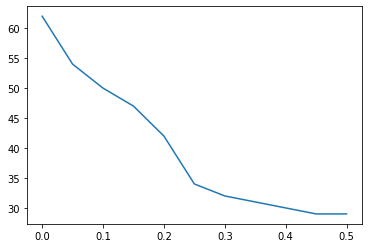

*****FIM IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******


In [6]:
# Simulate delete columns with low variance
reports.simulate_delete_columns_with_low_variance(
    data_frame=precoce_ms_data_frame, thresholds=np.arange(0.0, 0.55, 0.05))
